# Logistic Regression Lab with pipelines

In this lab you will try out pipelines with what you've learned so far and practice logistic regression on teh titanic dataset.

    ../../assets/datasets/train.csv

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('../../assets/datasets/train.csv')

In [48]:
df =df.dropna(axis=0, how='any')

In [58]:
df2 = pd.get_dummies(df, columns =[u'Sex',u'Embarked'], drop_first=True)





Then, let's create the training and test sets:

In [72]:
X = df2[[u'Pclass', u'Sex_male', u'Age', u'SibSp', u'Parch', u'Fare']]
y = df2['Survived']

X.dtypes

Pclass        int64
Sex_male    float64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [73]:
from sklearn.cross_validation import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 1. Model Pipeline

Try out making pipelines with different transformations (look at the scikit-learn documentation for some that you think would be good) with a LogisticRegression instance. 

Notice that a `sklearn.pipeline` can have an arbitrary number of transformation steps, but only one, optional, estimator step as the last one in the chain.

In [74]:
from sklearn.linear_model import LinearRegression

## 2. Train the model
Use `X_train` and `y_train` to fit the model.
Use `X_test` to generate predicted values for the target variable and save those in a new variable called `y_pred`.

In [75]:
regr = LinearRegression()

regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [76]:
regr.score(X_train, y_train)

0.35803773555251034

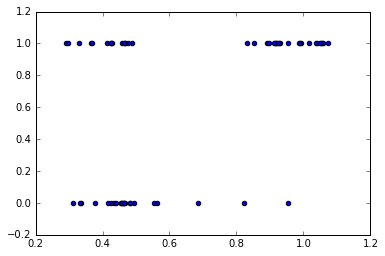

In [88]:
pred = regr.predict(X_test)

plt.scatter(pred, y_test)

y_test = pd.to_numeric(y_test)
pred = pd.to_numeric(pred)

## 3. Evaluate the model accuracy

1. Use the `confusion_matrix` and `classification_report` functions to assess the quality of the model.
- Embed the results of the `confusion_matrix` in a Pandas dataframe with appropriate column names and index, so that it's easier to understand what kind of error the model is incurring into.
- Are there more false positives or false negatives? (remember we are trying to predict survival)
- How does that relate to what the `classification_report` is showing?

In [90]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, pred)


ValueError: Can't handle mix of binary and continuous

## 4. Improving the model

Can we improve the accuracy of the model?

One way to do this is to use tune the parameters controlling it.

You can get a list of all the model parameters using `model.get_params().keys()`.

Discuss with your team which parameters you could try to change.

You can systematically probe parameter combinations by using the `GridSearchCV` function. Implement a new classifier that searches the best parameter combination.

1. How will you choose the grid granularity?
1. How can you prevent the grid to exponentially grow?

## 5. Assess the tuned model

A tuned grid search model stores the best parameter combination and the best estimator as attributes.

1. Use these to generate a new prediction vector `y_pred`.
- Use the `confusion matrix`and `classification_report` to assess the accuracy of the new model.
- How does the new model compare with the old one?
- What else could you do to improve the accuracy?

## Bonus

What would happen if we used a different scoring function? Would our results change?
Choose one or two classification metrics from the [sklearn provided metrics](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) and repeat the grid_search. Do your result change?